
# Primeira atividade de avaliação
Instruções: em dupla - entrega dia 07/04 - enviar para: tatitavares8@gmail.com

Utilizando a toolbox de sua preferência, realize o treinamento de uma rede neural artificial
do tipo Perceptron Multicamadas para resolver um problema de classificação multiclasses.
Além do conjunto de treinamento, considere um conjunto de validação para
avaliação final do método. Descreva as características dos dados, descreva a arquitetura da rede (dimensão, número de camadas) e discuta aspectos de desempenho (forma de divisão dos dados para treinamento, validação e
teste, porcentagem de classificação correta, matriz de confusão). Sugestão: Escolher
conjuntos de dados dentre os disponíveis no UC Irvine Machine Learning Repository :
http://archive.ics.uci.edu/ml/.

## Resolução primeira atividade
**Aluno: Matheus Jericó Palhares**

**Matrícula: 1931143051**

#### Dataset

http://archive.ics.uci.edu/ml/datasets/Iris

#### Atributos

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

#### 1. Bibliotecas

In [1]:
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, multilabel_confusion_matrix

#### 2. Importando dataset

In [2]:
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep = ',', header=None)

In [3]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 3. Renomeando colunas

In [4]:
dataset.rename(columns={0:'sepal_length',
                        1:'sepal_width',
                        2:'petal_length',
                        3:'petal_width',
                        4:'target'}, inplace=True)

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/home/matheuspalhares/anaconda3/envs/iesb/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Relação entre Variáveis')

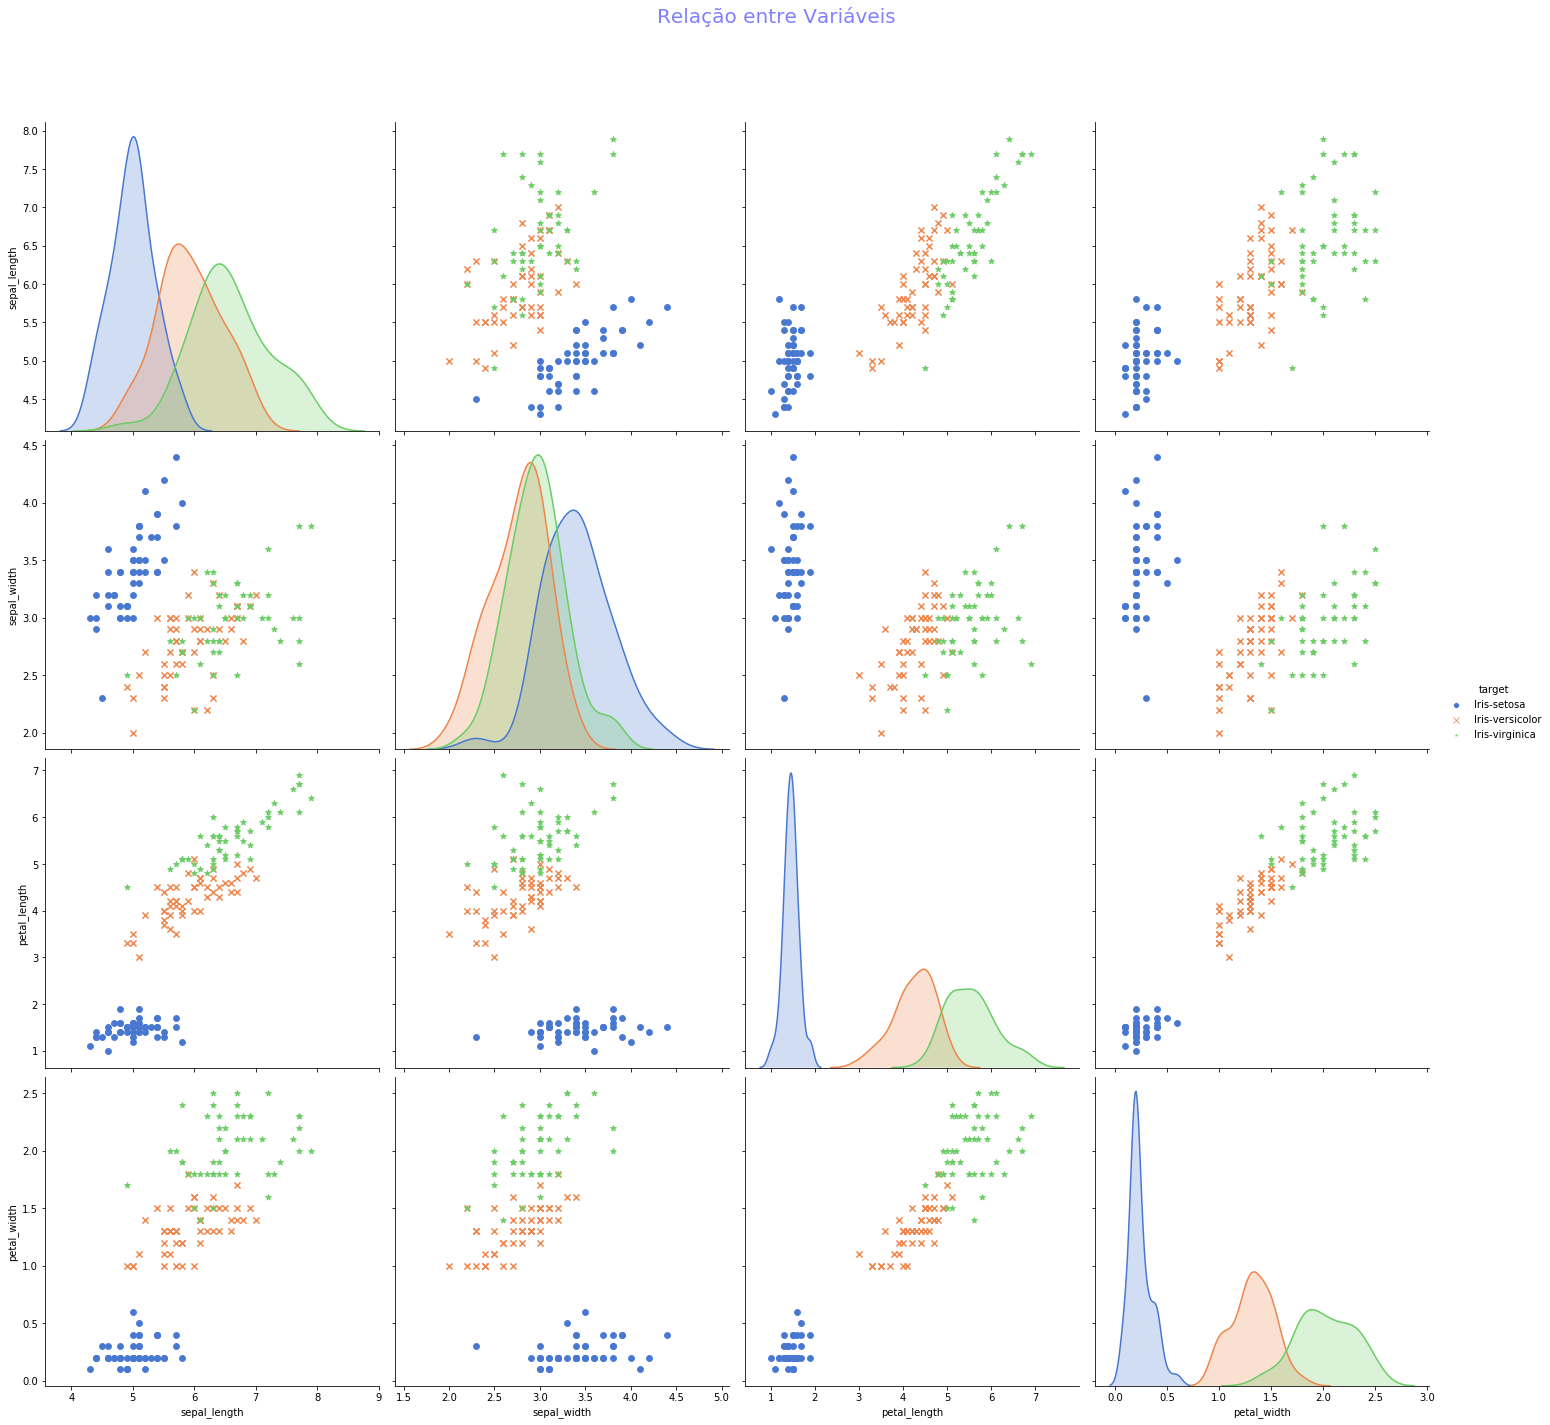

In [8]:
a = sns.pairplot(dataset, hue = 'target', palette = "muted", size = 5,\
                 vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],\
                 kind = 'scatter', markers = ['o','x','*'])

a = a.map_offdiag(plt.scatter, s = 35, alpha = 0.9)

sns.despine()

plt.subplots_adjust(top = 0.9)

#Añadir titulo
a.fig.suptitle('Relação entre Variáveis', fontsize = 20, color = 'b', alpha = 0.5)

- Esse é um famoso dataset de laboratório. Pois não possui valores faltantes, não possui outliers. 
- Dataset perfeito.

#### 4. Manipulando coluna target

In [9]:
dataset.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
dataset['target'] = dataset['target'].map(lambda x: x.split('-')[1])

In [11]:
dataset['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### 5. Separando variáveis

In [12]:
X = dataset.drop(columns= ['target'])
y = dataset['target']

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

In [15]:
# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Verificando formato
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (120, 4)
y_train.shape: (120,)
X_test.shape: (30, 4)
y_test.shape: (30,)


#### 6. Pré-processamento das variáveis independentes:

- Aplicando métodos de padronização dos dados, fazendo com que tenham uma distribuição normal.

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 7. Pré-processamento da variável dependente (target):
- Faço a verificação do formato dos labels, estão variando entre três strings: ['setosa', 'versicolor', 'virginica']
- Faço a categorização para transformar os labels de uma dimensão para três dimensões;

Exemplo:

- O label da categoria 'setosa' vai se tornar 0.
- Após a categorização o label '0' vai passar a ser uma representação em formato de array com múltiplas dimensões:
- [1, 0, 0]

In [17]:
# Verificando o formato dos labels
print("y_train.shape: {}".format(y_train.shape))

# Visualizando os 5 primeiros labels no y_train
print('Os 5 primeiros labels do y_train: {}'.format(y_train.values[:5]))

y_train.shape: (120,)
Os 5 primeiros labels do y_train: ['setosa' 'versicolor' 'setosa' 'setosa' 'versicolor']


In [18]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [19]:
print("Transformação de string para numérico:\n")
[print("{}: {}".format(le.classes_[i], le.transform(le.classes_)[i])) for i in range(0, len(le.classes_))]

Transformação de string para numérico:

setosa: 0
versicolor: 1
virginica: 2


[None, None, None]

In [20]:
# Verificando o formato dos labels
print("y_train.shape: {}".format(y_train.shape))

# Visualizando os 5 primeiros labels no y_train
print('Os 5 primeiros labels do y_train: {}'.format(y_train[:5]))

y_train.shape: (120,)
Os 5 primeiros labels do y_train: [0 1 0 0 1]


In [21]:
# Categorizando dos Y's
# Converter o array que possui apenas 1 dimensão, em um array com 10 dimensões.
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [22]:
# Verificando o formato dos labels
print("y_train.shape: {}".format(y_train.shape))

# Visualizando os 5 primeiros labels no y_train
print('Os 5 primeiros labels do y_train: \n{}'.format(y_train[:5]))

y_train.shape: (120, 3)
Os 5 primeiros labels do y_train: 
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


#### 7. Criando modelo com MLP

- Dense(): Camada densa da Rede neural, a primeira camada Dense tem que ter o parâmetro de input_dim com a quantidade de colunas de entrada;
- Activation(): Função de ativação, optei por utilizar a ReLu pois tenho um bom resultado com ela;
- BatchNormalization(): Utilizado para normalizar as ativações da camada anterior, obtive uma melhora na acurácia e uma menor probabilidade de ocorrer overfitting;
- Dropout(): Aplicado para prevenir overfitting durante o treinamento, 'cancela' 20% (parâmetro selecionado) das ligações entre nodes.

Reduzi o número de nodes em cada camada Densa, até que na camada de saída tenho 3 nodes, pois temos 3 classes a serem classificadas.

Função utilizada na camada de saída foi a 'softmax', apresenta a probabilidade de classificação de cada classe, fazendo a selecão da classe que tem maior probabilidade.


In [23]:
# Criando o modelo
model = keras.models.Sequential()

# Camada de entrada
model.add(keras.layers.Dense(100, input_dim=4))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

# Camada interna
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

# Camada de saida
model.add(keras.layers.Dense(3))
model.add(keras.layers.Activation("softmax"))

In [24]:
# Parametros
NUM_EPOCHS = 25
BS = 32
EPOCHS = 300

#### 8. Compilando o Modelo

- loss: 'categorical_crossentropy' utilizado pois é uma classificação com mais de 2 classes;
- optimizer: Adam. Backpropagation.



In [25]:
# Compilar modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

#### 9. Treinamento do modelo

In [26]:
# Fit no modelo
H1 = model.fit(X_train, y_train, batch_size=BS, epochs= EPOCHS, verbose=1)

Train on 120 samples
Epoch 1/300
120/120 [==============================] - 2s 20ms/sample - loss: 1.1339 - accuracy: 0.4167
Epoch 2/300
120/120 [==============================] - 0s 230us/sample - loss: 0.7878 - accuracy: 0.6583
Epoch 3/300
120/120 [==============================] - 0s 351us/sample - loss: 0.6918 - accuracy: 0.7000
Epoch 4/300
120/120 [==============================] - 0s 286us/sample - loss: 0.5492 - accuracy: 0.7500
Epoch 5/300
120/120 [==============================] - 0s 343us/sample - loss: 0.4252 - accuracy: 0.8250
Epoch 6/300
120/120 [==============================] - 0s 293us/sample - loss: 0.4136 - accuracy: 0.8417
Epoch 7/300
120/120 [==============================] - 0s 580us/sample - loss: 0.3973 - accuracy: 0.8083
Epoch 8/300
120/120 [==============================] - 0s 398us/sample - loss: 0.3437 - accuracy: 0.8667
Epoch 9/300
120/120 [==============================] - 0s 486us/sample - loss: 0.3561 - accuracy: 0.8500
Epoch 10/300
120/120 [=============

120/120 [==============================] - 0s 323us/sample - loss: 0.0875 - accuracy: 0.9750
Epoch 78/300
120/120 [==============================] - 0s 441us/sample - loss: 0.0666 - accuracy: 0.9833
Epoch 79/300
120/120 [==============================] - 0s 362us/sample - loss: 0.1068 - accuracy: 0.9833
Epoch 80/300
120/120 [==============================] - 0s 316us/sample - loss: 0.0754 - accuracy: 0.9833
Epoch 81/300
120/120 [==============================] - 0s 361us/sample - loss: 0.0705 - accuracy: 0.9833
Epoch 82/300
120/120 [==============================] - 0s 381us/sample - loss: 0.0916 - accuracy: 0.9750
Epoch 83/300
120/120 [==============================] - 0s 322us/sample - loss: 0.1159 - accuracy: 0.9500
Epoch 84/300
120/120 [==============================] - 0s 289us/sample - loss: 0.0788 - accuracy: 0.9750
Epoch 85/300
120/120 [==============================] - 0s 303us/sample - loss: 0.1160 - accuracy: 0.9500
Epoch 86/300
120/120 [==============================] - 0s 

120/120 [==============================] - 0s 317us/sample - loss: 0.0683 - accuracy: 0.9833
Epoch 154/300
120/120 [==============================] - 0s 261us/sample - loss: 0.0558 - accuracy: 0.9917
Epoch 155/300
120/120 [==============================] - 0s 301us/sample - loss: 0.0412 - accuracy: 0.9833
Epoch 156/300
120/120 [==============================] - 0s 515us/sample - loss: 0.0538 - accuracy: 0.9667
Epoch 157/300
120/120 [==============================] - 0s 846us/sample - loss: 0.0438 - accuracy: 0.9917
Epoch 158/300
120/120 [==============================] - 0s 683us/sample - loss: 0.0529 - accuracy: 0.9750
Epoch 159/300
120/120 [==============================] - 0s 587us/sample - loss: 0.0464 - accuracy: 0.9833
Epoch 160/300
120/120 [==============================] - 0s 269us/sample - loss: 0.0351 - accuracy: 0.9833
Epoch 161/300
120/120 [==============================] - 0s 2ms/sample - loss: 0.0334 - accuracy: 1.0000
Epoch 162/300
120/120 [==============================

Epoch 229/300
120/120 [==============================] - 0s 336us/sample - loss: 0.0485 - accuracy: 0.9917
Epoch 230/300
120/120 [==============================] - 0s 371us/sample - loss: 0.0351 - accuracy: 0.9917
Epoch 231/300
120/120 [==============================] - 0s 423us/sample - loss: 0.0390 - accuracy: 0.9750
Epoch 232/300
120/120 [==============================] - 0s 352us/sample - loss: 0.0252 - accuracy: 0.9917
Epoch 233/300
120/120 [==============================] - 0s 520us/sample - loss: 0.0664 - accuracy: 0.9667
Epoch 234/300
120/120 [==============================] - 0s 463us/sample - loss: 0.0256 - accuracy: 0.9917
Epoch 235/300
120/120 [==============================] - 0s 354us/sample - loss: 0.0420 - accuracy: 0.9917
Epoch 236/300
120/120 [==============================] - 0s 423us/sample - loss: 0.0479 - accuracy: 0.9667
Epoch 237/300
120/120 [==============================] - 0s 282us/sample - loss: 0.0237 - accuracy: 1.0000
Epoch 238/300
120/120 [==============

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                4

#### 10. Avaliando modelo MLP

- Utilizo a função evaluate() para obter a acurácia e o erro nos dados de teste

In [28]:
# Mostrando resultados
scores = model.evaluate(X_test, y_test)
# Mostrando o erro e acurácia do modelo MLP
print("Accuracy do Modelo MLP: {:.5}%".format(scores[1]*100))

30/30 [==============================] - 0s 15ms/sample - loss: 0.1382 - accuracy: 0.9667
Accuracy do Modelo MLP: 96.667%


#### 11. Predição do modelo MLP

- Utilizo a função predict_classes() para fazer a predição dos dados de teste.
    - Categorizo a predição.



In [29]:
preds = model.predict_classes(X_test)
print(preds[1])
preds = keras.utils.to_categorical(preds)
print(preds[1])

1
[0. 1. 0.]


- Avaliando o modelo com a função classification_report(): obtenho as metricas de precisão, recall e f1-score, além da quantidade de imagens para cada classificação



In [30]:
# Mostrando precisão, recall e f1-score do modelo MLP
print(classification_report(y_test, preds, target_names = le.classes_))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



- Utilizo a função multilabel_confusion_matrix() para verificar a matriz de confusão de cada label


In [31]:
# Matriz de confusão do Modelo MLP
matriz_confusão = multilabel_confusion_matrix(y_test, preds)

In [32]:
# Visualizando matriz de confusão do Modelo MLP
for i, matriz in enumerate(matriz_confusão):
    print("\nMatriz de confusão da classificação da classe: {} ".format(le.classes_[i]))
    print(matriz)


Matriz de confusão da classificação da classe: setosa 
[[23  0]
 [ 0  7]]

Matriz de confusão da classificação da classe: versicolor 
[[18  1]
 [ 0 11]]

Matriz de confusão da classificação da classe: virginica 
[[18  0]
 [ 1 11]]


#### FIM

# Segunda atividade de avaliação

Implemente um rede neural artificial do tipo Perceptron com uma camada oculta para solução do problema XOR.
Obs: utilizar apenas as tooboxs matemáticas, como numpy para o python.

#### Implementando MLP com o framework NumPy

#### 1. Importando biblioteca numpy


In [33]:
import numpy as np
from sklearn.metrics import classification_report, multilabel_confusion_matrix

#### 2. Criando a classe Layer
- Bloco de construção fictícia da Layer.


In [34]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # calcula a saída Y de uma camada para uma determinada entrada X
    def forward_propagation(self, input):
        raise NotImplementedError

        # calcula dE / dX para um dado dE / dY (e atualiza os parâmetros, se houver)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

#### 3. Criando métodos para função de ativação tanH

In [35]:
# função de ativação e a derivada
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

#### 4. Criando da camada Densa
- Bloco de construção da camada Densa.


In [36]:
class FCLayer(Layer):
    # input_size = numero de neurônios de entrada
    # output_size = numero de neurônios de saída
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # retorna a saída para uma determinada entrada
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # calcula dE / dW, dE / dB para um dado output_error = dE / dY. Retorna input_error = dE / dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        # update pesos e vies
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

#### 5. Criando classe para camada de ativação

In [37]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # retorna a entrada ativada
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Retorna input_error = dE / dX para um determinado output_error = dE / dY.
    # learning_rate não é usado porque não há parâmetros "aprendíveis"..
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

#### 6. Loss function e derivada


In [38]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

#### 7. Criando a Rede

In [39]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # adicionando camadas a rede
    def add(self, layer):
        self.layers.append(layer)

    # setando loss function
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predição da saída com base na camada de entrada
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # executar rede em todas as amostras
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # treinando a rede 
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # loop de treino
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # computando loss
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calcular erro médio em todas as amostras
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

#### 8. Criando rede neural utilizando as classes


In [40]:
# dados
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# neural network
net = Network()
net.add(FCLayer(2, 3))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_prime))

# treino
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=1500, learning_rate=0.1)


epoch 1/1500   error=0.368355
epoch 2/1500   error=0.303273
epoch 3/1500   error=0.292346
epoch 4/1500   error=0.289195
epoch 5/1500   error=0.287828
epoch 6/1500   error=0.287005
epoch 7/1500   error=0.286375
epoch 8/1500   error=0.285818
epoch 9/1500   error=0.285285
epoch 10/1500   error=0.284754
epoch 11/1500   error=0.284213
epoch 12/1500   error=0.283657
epoch 13/1500   error=0.283082
epoch 14/1500   error=0.282486
epoch 15/1500   error=0.281868
epoch 16/1500   error=0.281225
epoch 17/1500   error=0.280558
epoch 18/1500   error=0.279865
epoch 19/1500   error=0.279145
epoch 20/1500   error=0.278397
epoch 21/1500   error=0.277622
epoch 22/1500   error=0.276819
epoch 23/1500   error=0.275987
epoch 24/1500   error=0.275126
epoch 25/1500   error=0.274236
epoch 26/1500   error=0.273316
epoch 27/1500   error=0.272368
epoch 28/1500   error=0.271392
epoch 29/1500   error=0.270387
epoch 30/1500   error=0.269354
epoch 31/1500   error=0.268295
epoch 32/1500   error=0.267210
epoch 33/1500   e

epoch 271/1500   error=0.003358
epoch 272/1500   error=0.003313
epoch 273/1500   error=0.003269
epoch 274/1500   error=0.003226
epoch 275/1500   error=0.003184
epoch 276/1500   error=0.003143
epoch 277/1500   error=0.003103
epoch 278/1500   error=0.003064
epoch 279/1500   error=0.003026
epoch 280/1500   error=0.002989
epoch 281/1500   error=0.002953
epoch 282/1500   error=0.002917
epoch 283/1500   error=0.002882
epoch 284/1500   error=0.002848
epoch 285/1500   error=0.002815
epoch 286/1500   error=0.002782
epoch 287/1500   error=0.002750
epoch 288/1500   error=0.002719
epoch 289/1500   error=0.002688
epoch 290/1500   error=0.002658
epoch 291/1500   error=0.002629
epoch 292/1500   error=0.002600
epoch 293/1500   error=0.002572
epoch 294/1500   error=0.002544
epoch 295/1500   error=0.002517
epoch 296/1500   error=0.002490
epoch 297/1500   error=0.002464
epoch 298/1500   error=0.002438
epoch 299/1500   error=0.002413
epoch 300/1500   error=0.002388
epoch 301/1500   error=0.002364
epoch 30

epoch 576/1500   error=0.000567
epoch 577/1500   error=0.000566
epoch 578/1500   error=0.000564
epoch 579/1500   error=0.000562
epoch 580/1500   error=0.000561
epoch 581/1500   error=0.000559
epoch 582/1500   error=0.000557
epoch 583/1500   error=0.000556
epoch 584/1500   error=0.000554
epoch 585/1500   error=0.000553
epoch 586/1500   error=0.000551
epoch 587/1500   error=0.000549
epoch 588/1500   error=0.000548
epoch 589/1500   error=0.000546
epoch 590/1500   error=0.000545
epoch 591/1500   error=0.000543
epoch 592/1500   error=0.000542
epoch 593/1500   error=0.000540
epoch 594/1500   error=0.000538
epoch 595/1500   error=0.000537
epoch 596/1500   error=0.000535
epoch 597/1500   error=0.000534
epoch 598/1500   error=0.000532
epoch 599/1500   error=0.000531
epoch 600/1500   error=0.000529
epoch 601/1500   error=0.000528
epoch 602/1500   error=0.000527
epoch 603/1500   error=0.000525
epoch 604/1500   error=0.000524
epoch 605/1500   error=0.000522
epoch 606/1500   error=0.000521
epoch 60

epoch 869/1500   error=0.000297
epoch 870/1500   error=0.000297
epoch 871/1500   error=0.000296
epoch 872/1500   error=0.000296
epoch 873/1500   error=0.000295
epoch 874/1500   error=0.000295
epoch 875/1500   error=0.000294
epoch 876/1500   error=0.000294
epoch 877/1500   error=0.000293
epoch 878/1500   error=0.000293
epoch 879/1500   error=0.000293
epoch 880/1500   error=0.000292
epoch 881/1500   error=0.000292
epoch 882/1500   error=0.000291
epoch 883/1500   error=0.000291
epoch 884/1500   error=0.000290
epoch 885/1500   error=0.000290
epoch 886/1500   error=0.000289
epoch 887/1500   error=0.000289
epoch 888/1500   error=0.000288
epoch 889/1500   error=0.000288
epoch 890/1500   error=0.000287
epoch 891/1500   error=0.000287
epoch 892/1500   error=0.000286
epoch 893/1500   error=0.000286
epoch 894/1500   error=0.000285
epoch 895/1500   error=0.000285
epoch 896/1500   error=0.000285
epoch 897/1500   error=0.000284
epoch 898/1500   error=0.000284
epoch 899/1500   error=0.000283
epoch 90

epoch 1173/1500   error=0.000196
epoch 1174/1500   error=0.000195
epoch 1175/1500   error=0.000195
epoch 1176/1500   error=0.000195
epoch 1177/1500   error=0.000195
epoch 1178/1500   error=0.000194
epoch 1179/1500   error=0.000194
epoch 1180/1500   error=0.000194
epoch 1181/1500   error=0.000194
epoch 1182/1500   error=0.000194
epoch 1183/1500   error=0.000193
epoch 1184/1500   error=0.000193
epoch 1185/1500   error=0.000193
epoch 1186/1500   error=0.000193
epoch 1187/1500   error=0.000193
epoch 1188/1500   error=0.000193
epoch 1189/1500   error=0.000193
epoch 1190/1500   error=0.000192
epoch 1191/1500   error=0.000193
epoch 1192/1500   error=0.000192
epoch 1193/1500   error=0.000193
epoch 1194/1500   error=0.000192
epoch 1195/1500   error=0.000193
epoch 1196/1500   error=0.000193
epoch 1197/1500   error=0.000194
epoch 1198/1500   error=0.000194
epoch 1199/1500   error=0.000195
epoch 1200/1500   error=0.000196
epoch 1201/1500   error=0.000198
epoch 1202/1500   error=0.000199
epoch 1203

epoch 1449/1500   error=0.000152
epoch 1450/1500   error=0.000152
epoch 1451/1500   error=0.000152
epoch 1452/1500   error=0.000152
epoch 1453/1500   error=0.000152
epoch 1454/1500   error=0.000152
epoch 1455/1500   error=0.000152
epoch 1456/1500   error=0.000151
epoch 1457/1500   error=0.000151
epoch 1458/1500   error=0.000151
epoch 1459/1500   error=0.000151
epoch 1460/1500   error=0.000151
epoch 1461/1500   error=0.000151
epoch 1462/1500   error=0.000151
epoch 1463/1500   error=0.000151
epoch 1464/1500   error=0.000150
epoch 1465/1500   error=0.000150
epoch 1466/1500   error=0.000150
epoch 1467/1500   error=0.000150
epoch 1468/1500   error=0.000150
epoch 1469/1500   error=0.000150
epoch 1470/1500   error=0.000150
epoch 1471/1500   error=0.000149
epoch 1472/1500   error=0.000149
epoch 1473/1500   error=0.000149
epoch 1474/1500   error=0.000149
epoch 1475/1500   error=0.000149
epoch 1476/1500   error=0.000149
epoch 1477/1500   error=0.000149
epoch 1478/1500   error=0.000148
epoch 1479

In [41]:
# test
out = net.predict(x_train)
for i in range(0, len(x_train)):
    print("Entrada: {}\nSaída: {} \n\n".format(x_train[i], np.absolute(np.around(out[i]))))

Entrada: [[0 0]]
Saída: [[0.]] 


Entrada: [[0 1]]
Saída: [[1.]] 


Entrada: [[1 0]]
Saída: [[1.]] 


Entrada: [[1 1]]
Saída: [[0.]] 




#### FIM